# Computer Vision - Assignment 1 - Convolution and Derivatives

#### 10 (+3) points   |   Due date: October 28, 23:59   |   Submission site: https://pradogrado2223.ugr.es/

### Student's Full Name: <mark>Juan Miguel Gomez Daza</mark>

The goal of this assignment is to learn how to use OpenCV to implement convolution-based image filtering techniques. 


---


## Normas de entrega

Para este trabajo, al igual que para los demás, se deben presentar  las valoraciones y decisiones adoptadas en cada uno de los apartados. También deberá incluirse una valoración sobre la calidad de los resultados obtenidos. Se recuerda que código sin informe explicativo no puntúa.

Este trabajo de implementación tiene como objetivo principal aprender a implementar filtros de convolución y, particularmente, el cálculo de las derivadas de una imagen. El documento pdf sobre Gaussian discretization disponible en PRADO (https://pradogrado2223.ugr.es/pluginfile.php/209014/mod_folder/content/0/Bibliografia/Gaussian_discretization.pdf) puede resultar de gran utilidad para la implementación del ejercicio 1.A.

Normas de entrega (EL INCUMPLIMIENTO DE ESTAS NORMAS SIGNIFICA PÉRDIDA DIRECTA DE 1 PUNTO CADA VEZ QUE SE DETECTE UN INCUMPLIMIENTO):

1. El diseño de celdas del documento debe ser respetado.
2. Solo se entregará el código fuente (fichero .ipynb) y no se enviarán las imágenes empleadas.
3. Los path que se usen en la lectura de imágenes o cualquier otro fichero de entrada debe ser siempre “/content/drive/My Drive/images/nombre_fichero”
4. El código deberá  presentarse con los resultados obtenidos en cada apartado junto con los  correspondientes comentarios y valoraciones.  Recuerde que la entrega de código sin informe explicativo o valoraciones no puntúa.

---

In [2]:
# We start by getting access to the drive
from google.colab import drive
drive.mount('/content/drive')
# change directory
#% cd '/content/drive/MyDrive'
#  the current directory
#% pwd
import os
# this definition allows to read files in a specific path
get_image = lambda route: os.path.join('/content/drive/MyDrive/images', route)

Mounted at /content/drive


In [3]:
import sys,os
# Let's import the python module P0. 
# You must create the directory CV and put inside the file P0.py
# P0.py is the module created from your notebook P0.
path_to_module='/content/drive/MyDrive/CV/'
sys.path.append(os.path.abspath(path_to_module))

import P0

In [4]:
# We import the modules to use
import cv2, numpy as np, math
from matplotlib import pyplot as plt
# This allows to display images  and to save  them in cells
%matplotlib inline

# **Exercise-1**: Write Python code to implement the following tasks efficiently (4 points). 




## A)

Compute discrete masks of the 1D Gaussian and its normalized first and second derivatives. Consider both the size of the mask and the sigma value as possible inputs. Use the sigma values {1, 2.3, 3.7,5} and size masks {7,11,15} as inputs, and draw the mask values as 1D graphs using matplotlib. (1.5 points)

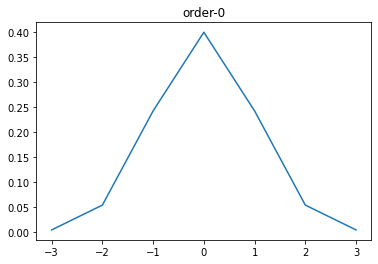

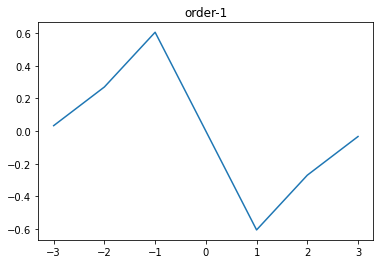

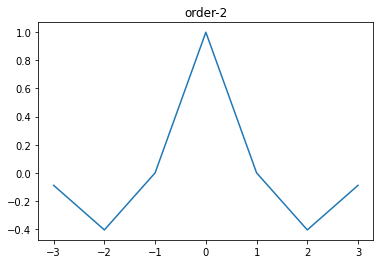

In [5]:
# toda entrada sizemask debe de ser impar: si el arguemnto no lo es se suma uno para tener tamano impar.
def gaussianMask1D(sigma=0, sizeMask=0, order=0):

  if sigma != 0:
    # las mascaras tienen que ser de tamano impar, por tanto k sera el primer impar mayor que 3*sigma -> 3*sigma viene de que en ese rango queda encerrado el 99.78% del area de la curva por tanto a partir de ahi,
    # se puede considerar 0 e area de (- inf, -3sigma)U(3sigma, inf)
    k = math.ceil(3*sigma) # aproxima al siguiente entero mayor que 3sigma
    sizeMask = 2*k + 1

  elif sizeMask != 0:
    k = math.ceil((sizeMask-1)/2)
    sigma = k/3.0

  x = np.linspace(-3*sigma,3*sigma,sizeMask) #inicialmente use np.arange pero esta no aniadia el ultimo valor y por ello he acabado usando linspace, no se puede usar range por que es solo para enteros
  
  mask = []
  sigma2 = sigma*sigma # sigma a cuadrado

  if order == 0:
    
    for i in x:
      i2 = i*i
      mask.append(math.exp(-(i2)/(2*sigma2)))

    mask = np.array(mask)/sum(mask) # La suma de la mascara de la gaussiana tiene que dar 0, 
  elif order == 1:

    for i in x:
      i2 = i*i
      mask.append((-i/sigma)*math.exp(-(i2)/(2*sigma2))) # derivada de la gaussiana normalizada (se multiplica la derivada por sigma)

  elif order == 2:

    for i in x:
      i2 = i*i
      mask.append(((sigma2-i2)/sigma2)*math.exp(-(i*i)/(2*sigma2))) # derivada 2da de la gaussiana normalizada (se multiplica la derivada segunda por sigma al cuadrado)

  else:
    print('Error: El orden indicado no es correcto.')

  return (x,mask)

def plotGraph(graph, title='No title'):
  plt.plot(graph[0],graph[1])
  plt.title(title)
  plt.show()

# Let's check the functions
# You must experiment with different values for sigma and sizeMask
# Write down your conclusions 
sigma=1
sizeMask=0
plotGraph(gaussianMask1D(sigma, sizeMask, order=0), title='order-0')
plotGraph(gaussianMask1D(sigma, sizeMask, order=1), title='order-1')
plotGraph(gaussianMask1D(sigma, sizeMask, order=2), title='order-2')

# Comentario Ejericicio 1.A.a

Arriba ha sido definida la funcion gaussianMask1D, esta funcion es utilizada para generar una mascara de tipo gaussiano de 1 dimension. Los posibles parametros son el tamaño de la máscara o el valor de sigma y el orden de la derivada de la funcion gaussiana, siendo 0 la gaussiana, 1 la primera derivada y 2 la segunda derivada.

La funcion lo que hace es basicamente discretizar la gaussiana, es decir calculamos el tamaño de la mascara ya sea con el valor de n=sizeMask o con sigma, y calcula los valores de las mascara dentro del rango (-3*sigma,3*sigma) con n puntos equidistantes. Mi implementacion forzará que el tamaño de la mascara, n, sea impar ya que pienso que de esta forma queda clara la propiedad de que la gaussiana tiene un valor central. Una vez tenemos calculados esos n valores equidistantes en este rango, se calculan los valores de la mascara sustituyendo en la formula de la gaussiana, la primera derivada o la segunda, según corresponda. Algo importante a tener en cuenta antes de retornar la mascara es que el valor tiene que ser normalizado. 

En el caso de la gaussiana por que si no se hace esa mascara convolucionada a otra imagen aumentará su energia, algo que no se debe permitir por que altera las propiedades de las imagenes. Por tanto dividimos la mascara por la suma total de sus valores.

En el caso de la primera y segunda derivada se multiplican por -i/sigma y 1 - i^2/sigma^2 respectivamente, con el objetivo de eliminar la dependencia de sigma ya que a mayor sigma menor es la respuesta de la convolucion con la derivada.

Los demás detalles de la implementacion pueden verse en los comentarios del codigo. 

En las imagenes ofrecidas como salida se observa como las mascaras tienen una forma similar a las esperadas por las funciones, algo que indica que vamos bien encaminados. 



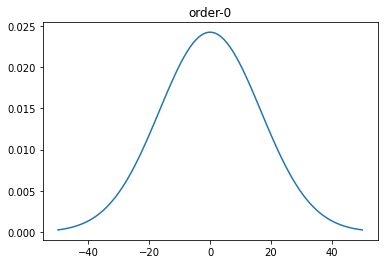

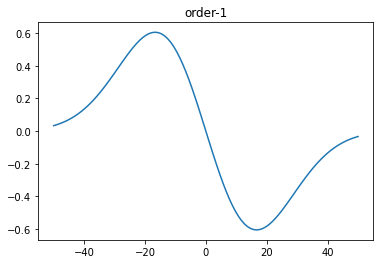

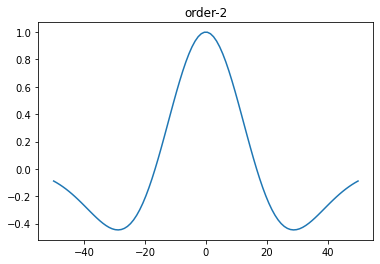

La mascara gaussiana suma:	0.9999999999999999
La mascara de la 1ra derivada suma:	-6.938893903907228e-18
La mascara de la 2da derivada suma:	0.010244355968446875


In [6]:
#Para comprobar que las funciones de la gaussiana y de las derivadas son correctas, ponemos un tamano de la mascara grande (o un sigma) y comparamos con las graficas de las funciones vistas en teoria
sizeMask = 100
sigma = 0
plotGraph(gaussianMask1D(sigma, sizeMask, order=0), title='order-0')
plotGraph(gaussianMask1D(sigma, sizeMask, order=1), title='order-1')
plotGraph(gaussianMask1D(sigma, sizeMask, order=2), title='order-2')

#En la primera imagen observamos que la gaussiana no llega a uno, al principio me ha extranado pero luego me he dado cuenta que es por que esta normalizada.
# Ahora comprobamos que las normalizaciones son correctas, vamos a asegurar que la mascara gaussiana sume 1 y que las de las derivadas sume 0

sigma = 0
sizeMask = 7
mask = gaussianMask1D(sigma, sizeMask, order=0)[1]
print('La mascara gaussiana suma:\t' + str(sum(mask)))
mask = gaussianMask1D(sigma, sizeMask, order=1)[1]
print('La mascara de la 1ra derivada suma:\t' + str(sum(mask)))
mask = gaussianMask1D(sigma, sizeMask, order=2)[1]
print('La mascara de la 2da derivada suma:\t' + str(sum(mask)))

#Son valores muy cercanos a lo esperado y por ello los doy como buenos.



# Comentario 1.A.b
Para comprobar que efectivamente estas funciones son correctas las he dibujado con un tamaño de mascara bastante mayor, de manera que se observa mejor que las funciones dibujadas corresponden con la gaussiana y sus derivadas, ademas se muestra la suma de las mascaras y que cumplen las propiedades en gran medida. Me gustaria comentar de donde proviene la propiedad de que la suma de las derivadas nos de 0, y es que es ya que la gaussiana es una funcion simetrica es decir la pendiente en -x es la misma que en x pero de signo contrario, y por tanto se van contrarestando continuamente.

## B)




Read an image in gray level. Smooth it applying the convolution with masks defined by a set of increasing sigma values, i.e. sigma= 0.8,1.5,3,6,12. Display all smoothed images in the same canvas. Use the OpenCV’s function `sepFilter2D()` with masks computed using your functions from (A). (1.5 points)

In [7]:
#derivada 1era en x [1,0], suavizar [0,0], derivada 1era en y [0,1]
def my2DConv(im, sigma, orders):
  maskh = gaussianMask1D(sigma,order=orders[0])[1] # los valores de la mascara estan en la posicion 1 del array
  maskv = gaussianMask1D(sigma,order=orders[1])[1]

  maskh = np.array(maskh)
  maskv = np.array(maskv)
  # maskv = np.transpose(maskv) ## Explicar el problema
  


  if orders==[0,0]:
    return cv2.sepFilter2D(im,-1,maskh,maskv)
  elif orders==[1,0]:
    return cv2.sepFilter2D(im,-1,maskh,maskv)
  elif orders==[0,1]:
    return cv2.sepFilter2D(im,-1,maskh,maskv)
  elif orders==[2,0]:
    return cv2.sepFilter2D(im,-1,maskh,maskv)
  elif orders==[0,2]:
    return cv2.sepFilter2D(im,-1,maskh,maskv)
  else:
    ('error in the order of derivative')


# Comentario Ejericio 1.B I

**¿Qué se ha hecho?**

La funcion definida, my2DConv, es una función que realiza una convolucion 2D a partir de máscaras gaussianas 1D. Los parámetros de la función son la imagen a convolucionar, el valor de sigma, y el orden de las derivadas de la función gaussiana. 

**¿Cómo se ha hecho?**

La función ha reutilizado la función definida en el ejericicio 1.A, para calcular las máscaras que se necesitan, en este caso se necesitan una máscara horizontal y otra vertical, y se ha hecho uso de la función sepFilter2D implementada por la librería cv2. Esta función es capaz de generar una convolución 2D haciendo 2 convoluciones con máscaras 1D, está división es posible ya que estamos trabajando con máscaras gaussianas, y estas pueden ser separables. Como se indicaba en las presentación de la práctica podemos dividir la función gaussiana en una parte que depende de x y otra que depende de y, luego podemos generar un filtro que solo depende de x y se convoluciona por filas y otro que depende de y y se convolucion por columnas. Las derivadas de la gaussiana tambien son separables, basta con derivar la parte que corresponda respecto de x o de y.

**¿Por que se ha hecho así?**

El motivo de utilizar la propiedad de la separabilidad es que es mucho mas eficiente computacionalmente hacer dos convoluciones 1D que hacer una en 2D, al hacerlo utilizando la separabilidad el número de operaciones es bastante mas reducido.
De hecho el complejidad con un filtro mxm y una imagen nxn sería: O(n^2*m^2) para la convolucion normal y O(n^2*m) la convolucion utilizando la separabilidad.


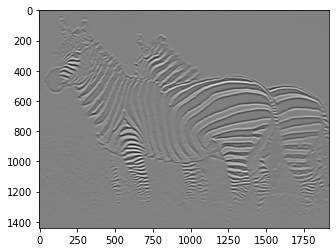

In [8]:
#prueba con primera derivada
im = cv2.imread(get_image('zebra.jpg'),0).astype(np.float64)
filtered = my2DConv(im,5,[0,2])
plt.imshow(filtered,cmap='gray')

In [9]:
im = cv2.imread(get_image('zebra.jpg'),0).astype(np.float64)

vim0=[]
orders=[0,0]
for sigma in [0.8,1.5,3,6,12]:
  vim0.append(my2DConv(im,sigma,orders))

orders=[1,0]
vim1=[]
for sigma in [0.8,1.5,3,6,12]:
  vim1.append(my2DConv(im,sigma,orders))

orders=[2,0]
vim2=[]
for sigma in [0.8,1.5,3,6,12]:
  vim2.append(my2DConv(im,sigma,orders))

vimL=[]
for sigma in [0.8,1.5,3,6,12]:
  vimL.append(my2DConv(im,sigma,[2,0]) + my2DConv(im,sigma,[0,2]))

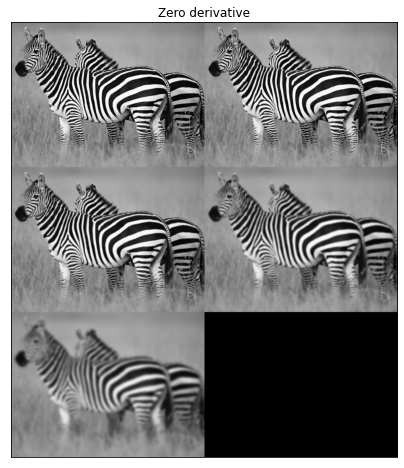

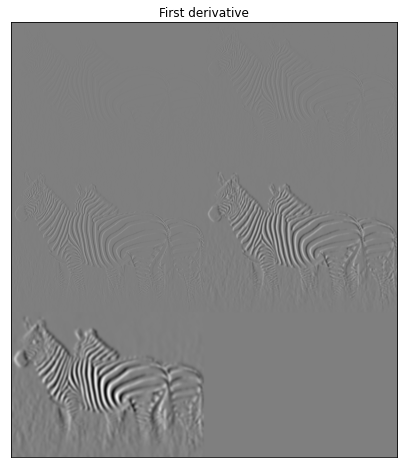

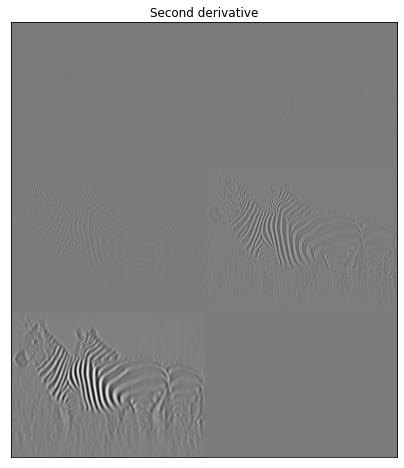

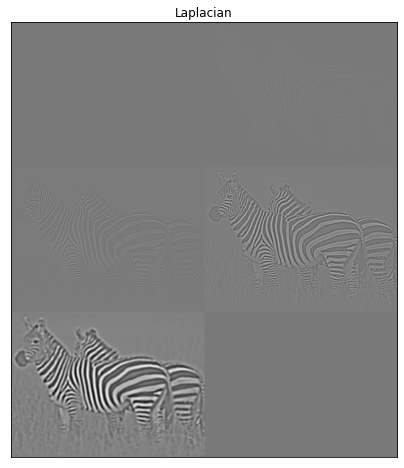

array([[ 11.16915367,   8.78168598,   3.61001423, ...,  15.19983496,
         14.32239451,  13.83179361],
       [  8.93627256,   7.11419047,   3.10122847, ...,  12.81593532,
         13.33161551,  13.56812946],
       [  5.69754466,   4.28742162,   1.69374206, ...,   6.13977636,
         10.00439067,  12.01025811],
       ...,
       [191.83126663, 191.96677292, 192.36812575, ...,   0.        ,
          0.        ,   0.        ],
       [191.62708693, 191.75818034, 192.14741028, ...,   0.        ,
          0.        ,   0.        ],
       [191.5586166 , 191.68819511, 192.07348366, ...,   0.        ,
          0.        ,   0.        ]])

In [10]:
P0.displayMI_ES(vim0, 'Zero derivative', factor=2)
P0.displayMI_ES(vim1, 'First derivative', factor=2)
P0.displayMI_ES(vim2, 'Second derivative', factor=2)
P0.displayMI_ES(vimL, 'Laplacian', factor=2)

# Comentario Ejericio 1.B II

**Resultados y Conclusiones**

Sobres los resultados he de decir que los obtenidos se corresponden con los esperados. 

En primer lugar, la función gaussiana (la convolución de orden [0,0]) realiza el suavizado correctamente. Esto se puede comprobar comparando la diferencia entre la primera y última imagen, y observando como al incrementar sigma esta cada vez se ve mas difuminado. Este tipo de operación en una imagen no nos servira para capturar formas ya que altera en cierta forma el contorno de las cosas pero en cambio será muy útil para obtener el tamaño de ciertos objetos.

En segundo lugar tenemos la primera derivada, en nuestro caso sobre el eje x, al contrario que la anterior esta nos es de gran ayuda a la hora de detectar los bordes de los objetos. En nuestro caso particular lo que mas descata es la figura de la cebra y sus manchas. Es interesante ver que cuando encuentra un cambio de frecuencia, esto para nosostros es un cambio de luminosidad grande, la imagen obtenidad tiene color blanco si ese cambio ha sido de negro a blanco, negro si ocurre el paso contrario y gris cuando el color no cambia.

La segunda derivada tambien puede ser utilizada para detectar los bordes de los objetos, además esta derivada es mas precisa. Mientras que la primera derivada encuentra un borde y lo pinta de un único color haciendo que los pixeles cercanos se difuminen con el gris, por otra parte lo que hace la segunda derivada al encontrar un borde es pintarlo de un color a la izquierda del borde y a la derecha del otro. De esta manera es mucho mas fácil señalar la posición exacta del borde.

Por último está el Laplaciano que es la suma de las segundas derivadas de la imagen, como se observa en la imagen de salida es todavia mas completa que las otras, ya que nos soluciona un problema del que no habiamos hablado antes. La primera y segunda derivada anterior detecta muy bien los bordes que son horizontales, no así los horizontales. Esto es debido a que las derivadas que hemos calculado son respecto de x, pero las derivadas respecto de y por su parte no calculan bien los bordes verticales (observar en el siguiente ejemplo).
El Laplaciano al ser la suma de las derivadas respecto de x y respecto de y nos genera una imagen con unos bordes mas reales.

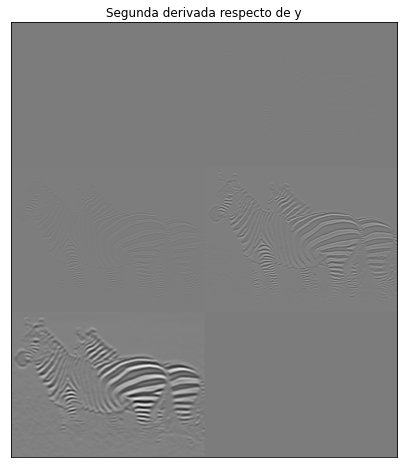

array([[ 4.66734477,  4.01428993,  2.42368376, ..., 12.95156272,
        11.27306782, 10.39471529],
       [ 3.01983132,  2.79280614,  2.0228205 , ..., 11.13956608,
         9.8464767 ,  9.17926613],
       [ 0.79717819,  0.9523377 ,  1.14048348, ...,  5.84082174,
         5.40369768,  5.21032482],
       ...,
       [84.02591707, 83.99698   , 83.89295477, ...,  0.        ,
         0.        ,  0.        ],
       [83.66922696, 83.64000821, 83.53450929, ...,  0.        ,
         0.        ,  0.        ],
       [83.54797044, 83.5186722 , 83.4128378 , ...,  0.        ,
         0.        ,  0.        ]])

In [11]:
# Observar que la derivada respecto de y no define bien los bordes que son verticales.
orders=[0,2]
vim3=[]
for sigma in [0.8,1.5,3,6,12]:
  vim3.append(my2DConv(im,sigma,orders))
  
P0.displayMI_ES(vim3, 'Segunda derivada respecto de y', factor=2)

Tambien podemos observar visulamente la forma que tienen los filtros 2D antes de aplicar la propiedad de la separabilidad. Las imagenes muetran en color blanco aquellos pixeles que suman más en la convolucion y negro los que suman menos o restan valor como en el caso de las derivadas.

De aqui es interesante comentar que la función gaussiana da gran importancia a los valores que estan entorno al pixel central, y conforme nos alejamos de este los pixeles se van oscureciendo. 

Por su lado el filtro de las derivadas tiene dos partes diferenciadas, una en color gris y otra en color blanco, y una separacion en color gris en medio de ambas partes. Este hecho es muy interesante por que nos hace entender bien el funcionamiento de la convolucion con estos filtros cunado se encuentran con un borde. El borde quedará en el medio y el valor del pixel sera grande puesto que a un lado tenemos pixeles que tienen gran importancia en el valor y al otro pixeles de poca importancia

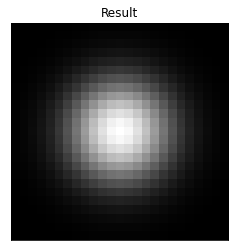

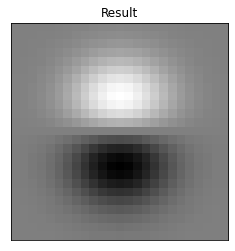

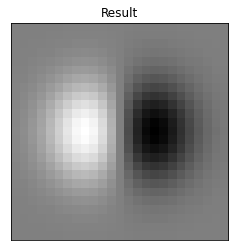

In [12]:
# Visulalizacion de los filtros de la gaussiana y su derivada primera
sigma = 4
filtro_dy = filtro_dx = np.array(gaussianMask1D(sigma, order=1)[1]) # los dos son un filtro 1d sobre la funcion de la derivada, sus valores son los mismos
filtro_y = filtro_x = np.array(gaussianMask1D(sigma, order=0)[1])  # los dos son un filtro 1d sobre la gaussiana

filtro_dx = filtro_dx.reshape((1,-1))
filtro_x = filtro_x.reshape((1,-1))
filtro_y = filtro_y.reshape((-1,1))
filtro_dy = filtro_dy.reshape((-1,1))

filtro2D_dx = filtro_dx * filtro_y
filtro2D_dy = filtro_x * filtro_dy
filtro2D_gaus = filtro_x * filtro_y


P0.displayIm(filtro2D_gaus)
P0.displayIm(filtro2D_dy)
P0.displayIm(filtro2D_dx)

También es interesante ver como al aumentar el sigma el numero de pixeles que utiliza el filtro tambien crece. Pero algo raro pasa, cada filtro es menos visible que el anterior, un blanco menos intenso. Esto se debe a que estamos utilzando una gaussiana normalizada, la suma de todos ellos tiene que ser uno igualmente, entonces al tener mas pixeles y normalizar esto hace que cada pixel del filtro 2D sea menos importante, pero por otro lado abarcamos más entorno.

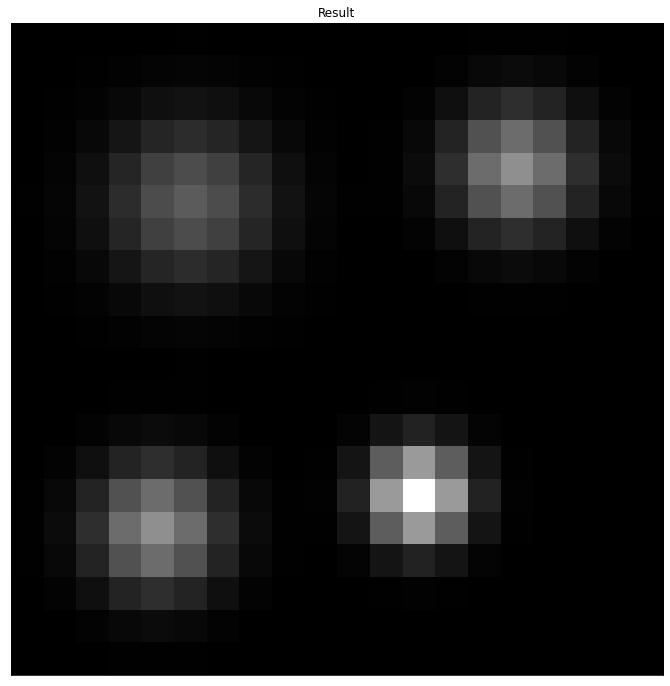

Con sigma = 1	la suma de los pixeles es: 0.9999999999999999
Con sigma = 1.2	la suma de los pixeles es: 0.9999999999999999
Con sigma = 1.3	la suma de los pixeles es: 0.9999999999999999
Con sigma = 1.5	la suma de los pixeles es: 0.9999999999999999


In [13]:
sigma = [1, 1.2, 1.3, 1.5]
vim = []

for i in sigma:
  filtro_y = filtro_x = np.array(gaussianMask1D(i, order=0)[1])  # los dos son un filtro 1d sobre la gaussiana

  filtro_x = filtro_x.reshape((1,-1))
  filtro_y = filtro_y.reshape((-1,1))

  filtro2D_gaus = filtro_x * filtro_y
  vim.append(filtro2D_gaus)


im = P0.displayMI_NES(vim)
P0.displayIm(im, factor=3)


for i in range(len(sigma)):
  print('Con sigma = ' + str(sigma[i]) + '\tla suma de los pixeles es: ' + str(np.sum(filtro2D_gaus)))


## C)	

Use the OpenCV’s function `sepFilter2D()` to compute the gradient and Laplacian images using your masks from (A). Display all results in the same canvas. (1 point)

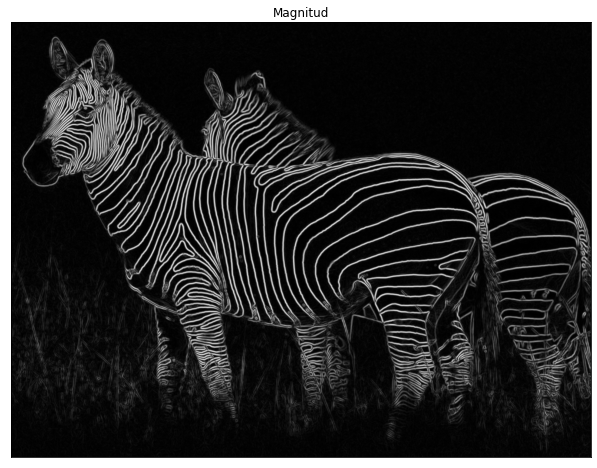

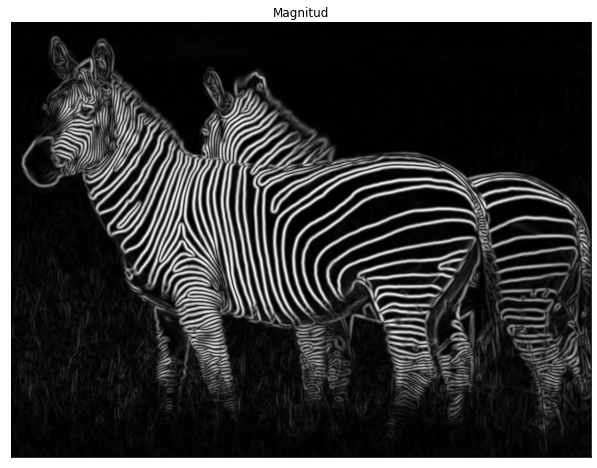

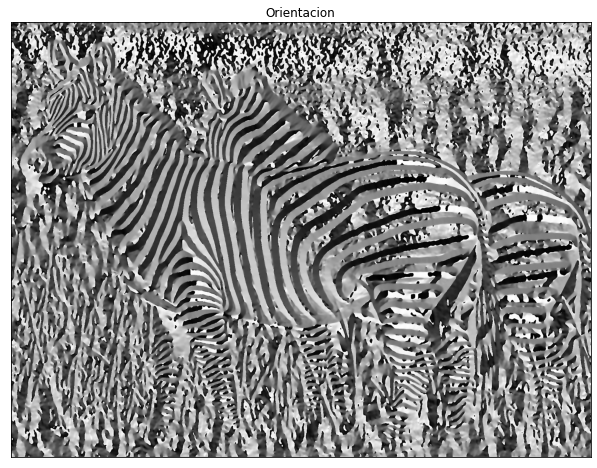

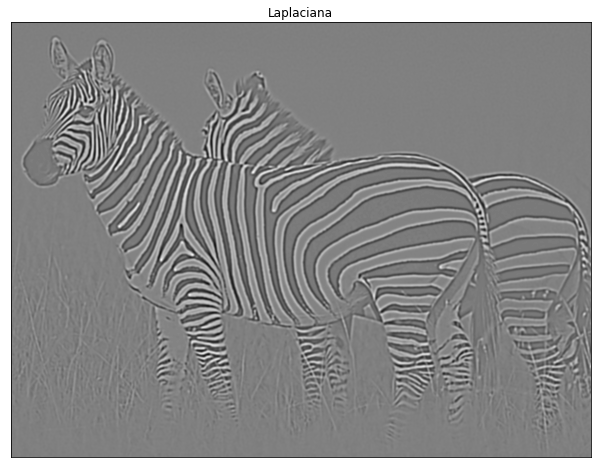

In [14]:
def gradientIM(im,sigma):
  dx = my2DConv(im,sigma,[1,0])
  dy = my2DConv(im,sigma,[0,1])
  return dx,dy

def laplacianG(im,sigma):
  return my2DConv(im,sigma,[2,0]) + my2DConv(im,sigma,[0,2])
  

# The computation must be done in floating point !!!
image = cv2.imread(get_image('zebra.jpg'),0).astype(np.float64)
sigma = 1.5


dx, dy = gradientIM(image,sigma)

mag = np.sqrt(np.power(dx,2) + np.power(dy,2)) # las funciones realizan las operaciones en toda el array elemento a elemento
P0.displayIm(mag,'Magnitud', factor=2)

####
sigma = 4

dx, dy = gradientIM(image,sigma)

mag = np.sqrt(np.power(dx,2) + np.power(dy,2)) # las funciones realizan las operaciones en toda el array elemento a elemento
P0.displayIm(mag,'Magnitud', factor=2)
###

orient = np.arctan2(dx, dy)
P0.displayIm(orient,'Orientacion', factor=2)

P0.displayIm(laplacianG(image,sigma),'Laplaciana', factor=2)


# Comentario Ejericio 1.C

Las imagenes obtenidas son interensante desde el punto de vista de reconocer los bordes. El primer ejemplo de ello es la imagen de la magnitud del gradiente, que no da informacion muy concreta de los bordes de nuestros objetos ya que nos muestra a la perfección la figura, en este caso, cada mancha de la cebra. En cambio del color que hay en el interior de la mancha no nos dice nada. 

Tambien hemos calculado la arcotangente al cuadrado del gradiente, y no ha dado como resultado una imagen muy bonita pero que es algo mas dificil de leer. En las zonas donde el color es constante y no hay bordes nos ha dibujado una especie de ruido, realmente no importa por que son zonas donde hay poca información interesante. En las zonas de bordes como las manchas de la zebra nos dibuja zonas con poca variacion de los colores, en estas zonas la derivada sobre x y la derivada sobre y no tiene cambios bruscos entre pixeles y esa es la explicación de estos resultados.

Por último tenemos la Laplaciana, que se calcula como la suma de las segundas derivadas parciales de la gaussiana. Esta la veo de más utilidad para detectar bordes ya que sabemos que las segundas derivadas nos da información mas exacta de la posición de un borde. Incluso se aprecia mejor la hierba que pisa la cebra.




# **Exercise-2**:  Using your functions from  previous exercises, write Python functions and show results for the following tasks (6 points).





## A) 

Build up a 4-level Gaussian pyramid for an image using Gaussian masks of size 7x7.  Display all levels  in the same canvas.  (2 points)

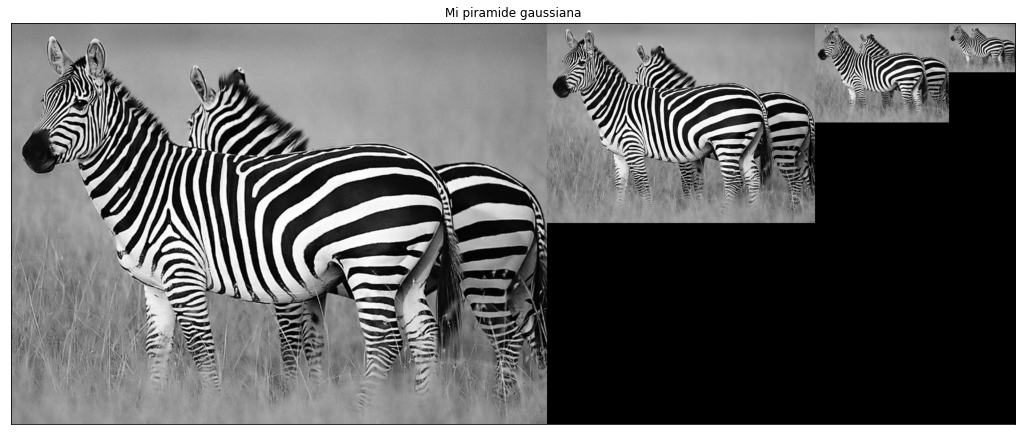

In [15]:
#Piramide gaussiana eliminando filas y columnas pares.
def pyramidGauss(im, size=7, nlevel=4):
  mask = gaussianMask1D(sizeMask=size,order=0)[1]
  mask = np.array(mask)
  vim = []

  vim.append(im)

  for i in range(nlevel-1):
    im = cv2.sepFilter2D(im,-1,mask,mask)
    im = im[::2,::2]
    vim.append(im)

  return vim

image = cv2.imread(get_image('zebra.jpg'),0).astype(np.float64)
pyrG = pyramidGauss(image, size=7, nlevel=4)
P0.displayIm(P0.displayMI_NES(pyrG), title='Mi piramide gaussiana', factor=3)


# Comentario Ejericio 2.A

**¿Qué se ha hecho?**

La funcion definida, pyramidGauss, es una función que nos devuelve la piramide Gaussiana de una imagen dada. Los parámetros de la función son la imagen de la que deseada, el valor de la máscara, y el tamaño de la piramide, y como resultado nos devolverá la piramide que es una sucesión de imagenes cada una de la mitad de tamaño que la anterior y que no pierde información.

**¿Cómo se ha hecho?**

La función ha reutilizado la función definida en el ejericicio 1.A, para calcular las máscaras gaussianas 1D, en este caso se necesitan una máscara horizontal y otra vertical, pero como lo que queremos es suavizar usaremos la misma máscara 1D y llamaremos a sepFilter2D con la misma máscara en ambos parametros, esto producira una imagen suavizada del mismo tamaño que la original. Posteriormente reduciremos el tamaño de la imagen a la mitad eliminando todas las filas y columnas pares. Otra opción posible aquí sería calcular la media cada 4 pixeles y fusionarlos. Observar la diferencia en el siguiente código. Cada vez que repetimos este proceso almacenamos la imagen en el array vim que almacenará nuestra piramide gaussiana.

**¿Por que se ha hecho así?**

Esta es una representación es útil para trabajar a diferentes escalas, de hecho podemos decir que la Piramide Gaussiana es una discretización de la Teoría del Espacio de Escalas. Lo más interesante es que en los niveles más pequeños de las escala observaremos una información que no somos capaces de ver en capas superiores (ejemplo: ejercicio bonus), en cambio en estas capas superiores tendremos los detalles de la imagen. Así que se puede decir que a escalas diferentes encontramos información diferente. Por tanto preferiremos utilizar esta representación para ya que nos aporta más información y me atrevería a afirmar que **la Piramide Gaussiana una representación más completa que trabajar únicamente con  la imagen original.**

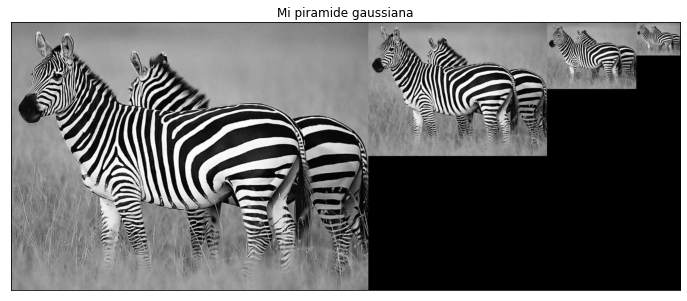

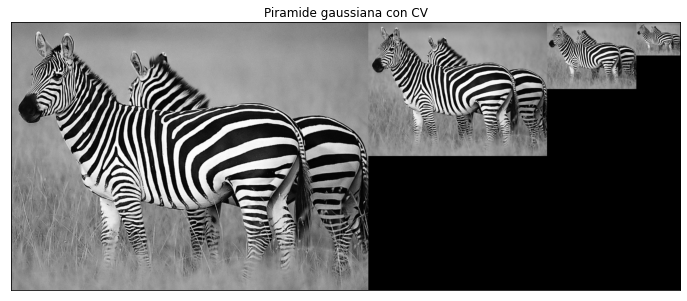

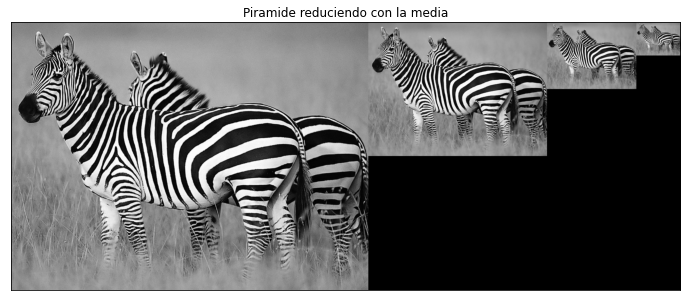

In [16]:
# Pyramide gaussiana reduciendo la imagen con la media de los pixeles.
def pyramidGauss_Average(im, size=7, nlevel=4):
  mask = gaussianMask1D(sizeMask=size,order=0)[1]
  mask = np.array(mask)
  vim = []

  vim.append(im)

  for i in range(nlevel-1): # reduciendo con el calculo de los cuatro pixeles 
    im = cv2.sepFilter2D(im,-1,mask,mask)
    im = np.add.reduceat(im, range(0,im.shape[1],2), axis=1)
    im = np.add.reduceat(im, range(0,im.shape[0],2), axis=0)
    im = im/4
    vim.append(im)

  return vim

def pyramidGaussCV(im, size=7, nlevel=4):
  vim = []

  vim.append(im)

  for i in range(nlevel-1):
    vim.append(cv2.pyrDown(pyramid[-1], borderType=BORDER_REPLICATE)) # Utilizando la funcion de la libreria cv

  return vim

image = cv2.imread(get_image('zebra.jpg'),0).astype(np.float64)

pyrG = pyramidGauss(image, size=7, nlevel=4)
pyrGCV = pyramidGauss(image, size=7, nlevel=4)
pyrGA = pyramidGauss_Average(image, size=7, nlevel=4)

P0.displayIm(P0.displayMI_NES(pyrG), title='Mi piramide gaussiana', factor=2)
P0.displayIm(P0.displayMI_NES(pyrGCV), title='Piramide gaussiana con CV', factor=2)
P0.displayIm(P0.displayMI_NES(pyrGA), title='Piramide reduciendo con la media', factor=2)

**Resultados y Conclusiones**

Los resultados obtenidos son una serie de imagenes. La primera es la original y tras ella el resto de imagenes que forman nuestra piramide. La piramide esta formada por capas, que son las imagenes, conforme subimos de capa el tamaño de la imagen asociada es menor, y de ahi viene el nombre de piramide.


Podemos ver que nuestra función nos aporta una salida idéntica visualmente a la que se obtiene con la función ya implementada en la librería, por tanto parece correcta.

Respecto a la reducción de la imagen tras el suaviazado, aun que pensaba que se apreciaría diferencia y que esta versión sería mas correcta para reducir la imagen a la mitad, lo cierto es que ambas imagenes se ven practicamente igual y de hecho realizarlo eliminando las filas y columnas pares es mas rápido por tanto me decanto por la opción que se aconseja en las diapositivas de la práctica. Voy a aprovechar para comentar que al suavizar primeramente no se pierde tanta información como yo esperaba y los bordes se mantienen aceptablemente. 

## B)

Using your code from A), implement a function to build a 4-level Laplacian pyramid.  The type of interpolation employed is now relevant. Show two examples using the images provided. Show all levels on the same canvas. (2 points) 

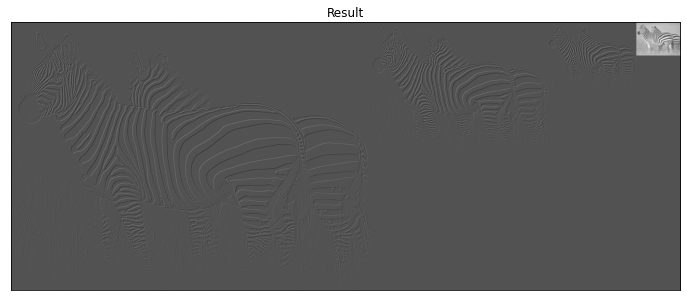

In [17]:
def pyramidLap(im, sizeMask ,nlevel=4, flagInterp=cv2.INTER_LINEAR):
  pyrG = pyramidGauss(im, sizeMask, nlevel)
  vimL = []

  pyrG = pyrG[::-1]
  vimL.append(pyrG[0])

  for i in range(nlevel-1):
    width = pyrG[i+1].shape[1]
    height = pyrG[i+1].shape[0]
    expanded = cv2.resize(pyrG[i], (width,height)) # dsize tiene el formato de width y heigh, es decir ncol x nfil
    diff = pyrG[i+1] - expanded
    vimL.append(diff)

  return vimL

image = cv2.imread(get_image('zebra.jpg'),0).astype(np.float64)
pyrL = pyramidLap(image, sizeMask=7, nlevel=4)
#P0.print_images_titles(pyrL)
P0.displayIm(P0.displayMI_NES(pyrL), factor=2)

# Comentario Ejericio 2.B

**¿Qué se ha hecho?**

La funcion definida, pyramidLap, es una función que nos devuelve la piramide Laplaciana de una imagen dada. Los parámetros de la función son la imagen, el valor de la máscara, y el tamaño de la piramide, y como resultado nos devolverá la piramide Laplaciana que se calcule con esos parametros.

**¿Cómo se ha hecho?**

Esta función inicialmente generará la piramide Gaussiana, haciendo una llamada a la función anterior, y almacenaremos su última capa en la primera capa de la piramide Laplaciana. A continuación lo que haremos será recorrer la piramide Gaussiana inversamente, cogiendo la imagen de cada capa i y expandiendola al tamaño de la siguiente capa, i+1, y calcularemos la diferencia entre la imagen expandida y la imagen del siguiente nivel. de la capa Gaussiana. Esta diferencia es la que almacenamo en la capa i+1 de la piramide Laplaciana.
El resultado de este proceso será una serie de imagenes, en primer lugar tendremos la imagen de la capa superior de la piramide Gaussiana, y a continuación las diferencias calculadas.

**¿Por que se ha hecho así?**

Esta es una representación trabaja principalmente con altas frecuencias, lo interesante de esta representación es que sin almacenar la imagen origina puede recontruirla sin perdidas, pero lo veremos a continuación. Como se ha dicho anteriormente a diferentes escalas hay diferentes informaciones, en este caso la piramide Laplaciana puede ser utilizada para detectar bordes dependiendo de la escala, por ejemplo en las capas superiores se podran observar los detalles de los objetos y en capas inferiores se podra informar de la forma de la figura más general.

**Resultados y Comentarios**

La imagenes obtenidas son las que esperadas y curiosamente al hacer esto obtenemos unas que son muy parecidas a las derivadas de la gaussiana. En el código de abajo se muestra una comparación. De las cuatro la más parecida a la imagen de la piramide Laplaciana es la primera derivada sobre x, por que coinciden los bordes coloreados blancos y coinciden los negros, aunque tambien es cierto que los bordes no se detectan tan bien como con a derivada.

Me parece muy interesante que surja este efecto de quedarnos con las altas frecuencias al calcular la diferencia de la imagen expandida, y creo que sería algo curioso para estudiar matemáticamente en mayor profundidad.


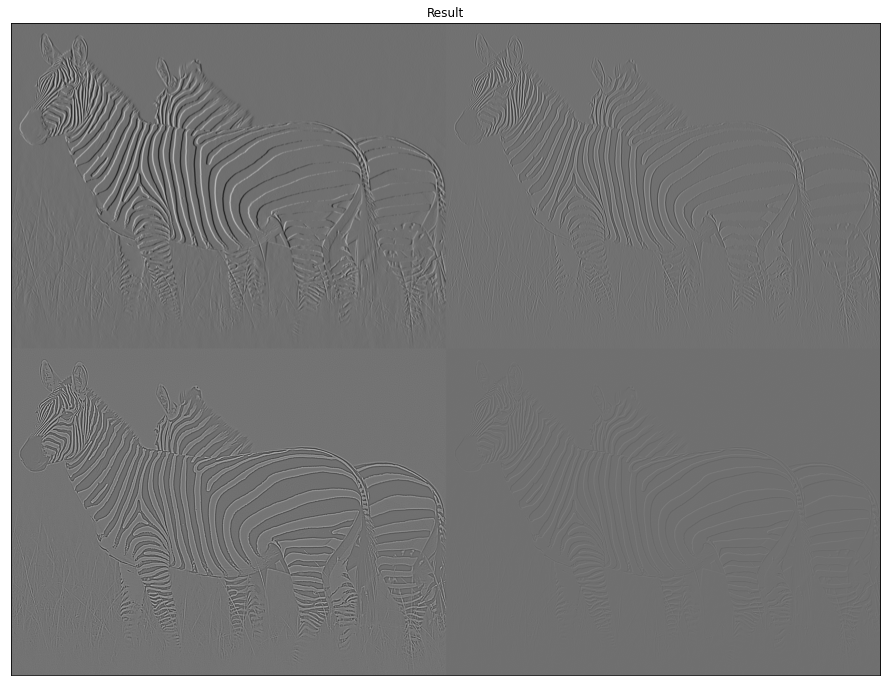

In [18]:
image = cv2.imread(get_image('zebra.jpg'),0).astype(np.float64)
sigma = 1.5

pyrL = pyramidLap(image, sizeMask=7, nlevel=4)

dx = my2DConv(image, sigma, [1,0]) # imagen derivada sobre x
dx2 = my2DConv(image, sigma, [2,0]) # imagen derivada sobre x 
lap = laplacianG(image, sigma) # laplaciano de la imagen
im_pyr = pyrL[-1] # primer elemento de la piramide laplaciana

vim = [dx, dx2, lap, im_pyr]

P0.displayIm(P0.displayMI_NES(vim), factor=3)

#P0.displayIm(im_pyr, factor=1, title='Piramide Laplaciana') # piramide laplaciana
#P0.displayIm(dx, factor=1, title='1era derivada sobre x')
#P0.displayIm(dx2, factor=1, title='2da derivada sobre x')
#P0.displayIm(lap, factor=1, title='Laplaciana')

## C) 

Implement a function to reconstruct the image encoded in the Laplacian pyramid. Take one of the pyramids from B) and verify that it is possible to obtain an exact copy of the original image. To do this, calculate the Frobenius norm of the difference between the original and the reconstructed images.(2 points)

Error per pixel zebra: 0.0


/content/drive/MyDrive/CV/P0.py:31: RuntimeWarning: invalid value encountered in true_divide
  im = (im + delta)/width
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


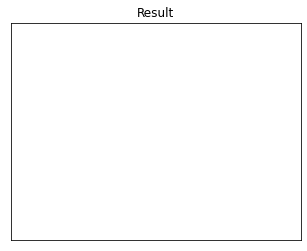

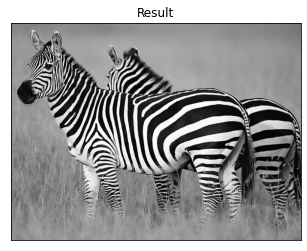




Error per pixel morgan_freeman: 0.0


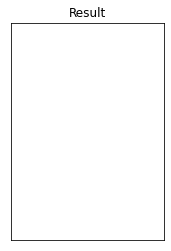

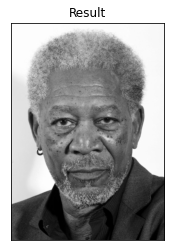

In [19]:
def reconstructIm(pyL,flagInterp):
  im = pyL[0]

  for i in pyL[1:]:
    #print(i.shape)
    width = i.shape[1]
    height = i.shape[0]
    im = cv2.resize(im,(width,height)) + i

  return im

im = cv2.imread(get_image('zebra.jpg'),0).astype(np.float64)
pyrL = pyramidLap(im, sizeMask=7, nlevel=4)
recons = reconstructIm(pyrL, cv2.INTER_LINEAR)
#print(recons.shape)
print('Error per pixel zebra:',np.sqrt(np.linalg.norm(im-np.round(recons), ord=2)/np.prod(im.shape)))
# The final error must be 0.0

diff = im - np.round(recons)

P0.displayIm(diff)
P0.displayIm(recons)

im = cv2.imread(get_image('morgan_freeman.jpg'),0).astype(np.float64)
pyrL = pyramidLap(im, sizeMask=7, nlevel=4)
recons = reconstructIm(pyrL, cv2.INTER_LINEAR)
#print(recons.shape)
print('\n\n\nError per pixel morgan_freeman:',np.sqrt(np.linalg.norm(im-np.round(recons), ord=2)/np.prod(im.shape)))
# The final error must be 0.0

diff = im - np.round(recons)
P0.displayIm(diff)
P0.displayIm(recons)

# Comentario Ejericio 2.C

**¿Qué se ha hecho?**

La funcion definida, reconstrucIm, es una función que nos devuelve la imagen original sin perdidas a partir de su piramide Laplaciana. Los parámetros de la función son la piramide, la salida será la imagen.

**¿Cómo se ha hecho?**

Esta función basicamente lo que hace es reconstruir la imagen original expandiendo la primera capa de la piramide, que es la imagen de tamaño menor, y le suma la imagen de la capa siguiente, con esto ya hemos recontruido la primera capa y el siguiente paso es repetir el proceso pero expandiendo la última imagen reconstruida, y reiterar los pasos hasta reconstruir todas las capas. En cada reconstrucción lo que generemas en realidad es una capa de la piramide Gaussiana, y es algo que comentaré en a continuación. La última imagen reconstruida en todo este proceso será la que se retorna, la imagen original sin perdidas.


**¿Por que se ha hecho así?**

Esta representación como hemos dicho puede generar la imagen original sin perdidas, y además, muy facilmente es capaz de obtener la representación de piramide Gaussiana. Por tanto pienso que es una representación muy buena ya que es capaz de dar la misma información de la piramide Gaussiana, que ya vimos que era mejor que la de imagen original, pero tambien nos da información de las altas frecuencias. Por todo esto pienso que es una representación superior a las otras, y este es el motivo de por que se ha hecho así.

**Resultados y Comentarios**

Teniendo en cuenta que el error obtenido en la reconstrucción es cero podemos afirmar que los resultados son correctos, se ha calculado la imagen de la diferencia y se ha obtenido una imagen en blanco, lo que es buen indicio de que no hay errores en los diferentes pixeles. He probado con imagenes diferentes y tenemos el mismo resultado por lo que nuestra función funciona bien. Algo esperado realmente puesto que la representación es sin perdida como antes hemos dicho.

# **BONUS: HYBRID IMAGES** (3 points)

This bonus section is based on the following paper about hybrid imaging: SIGGRAPH 2006 paper by Oliva, Torralba, and Schyns (https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf).  

 The goal of this bonus is to learn how the human visual system extracts information about an object depending on the distance. To do this, we construct a hybrid image from two images of different objects. By appropriately mixing part of the high frequencies of one image with part of the low frequencies of another image, we obtain a hybrid image that shows different perceptions with distance.  The smoothing of both images is the key aspect to select the high and low frequency range of each image.  The higher the sigma value, the greater the removal of high frequencies from the image. It is recommendable to choose this value separately for each of the images (see recommendations given in the article by Oliva et al.) and, in fact, more than one value may be possible. Steps to follow: 
 
1. Read the paper. 

2. Find the appropriate sigma values for each pair of images. Extract the low and high frequency images and calculate the hybrid image as the average of them. (Hint: the low frequencies must be really low).

3. Test at least two pairs of the provided ones. (Hint: Try gray level images first).

4. Use your visualization functions to display the Gaussian pyramid of the hybrid images. Explain the visual effect perceived. 

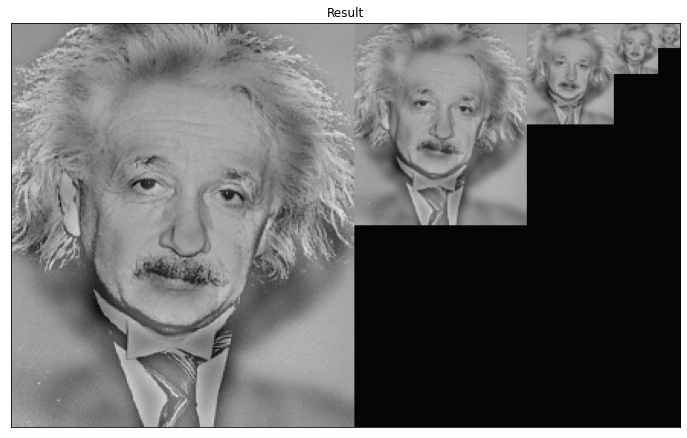

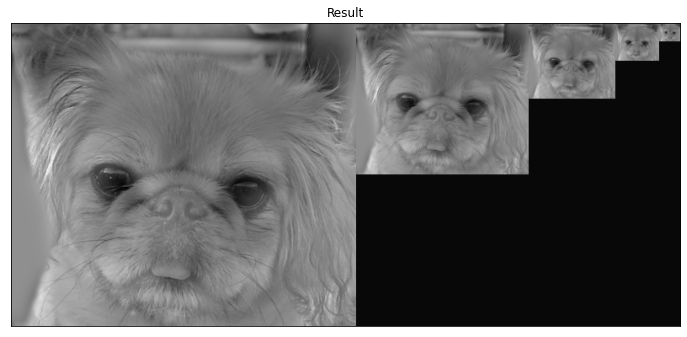

In [20]:
def hybridImages(imHF, imLF , sigma):
  HFfiltered = imHF - my2DConv(imHF, sigma, [0,0])
  LFfiltered = my2DConv(imLF, sigma, [0,0])

  im = HFfiltered + LFfiltered

  return im

marilyn = cv2.imread(get_image('marilyn.bmp'),0).astype(np.float64)
einstein = cv2.imread(get_image('einstein.bmp'),0).astype(np.float64)

out = hybridImages(einstein, marilyn, 5)

pyrG = pyramidGauss(out, 5, 5)
P0.displayIm(P0.displayMI_NES(pyrG), factor=2)


cat_im = cv2.imread(get_image('cat.bmp'),0).astype(np.float64)
dog_im = cv2.imread(get_image('dog.bmp'),0).astype(np.float64)

out2 = hybridImages(dog_im, cat_im, 9)

pyrG = pyramidGauss(out2, 5, 5)
P0.displayIm(P0.displayMI_NES(pyrG), factor=2)


# Comentario Ejericio Bonus

**¿Qué se ha hecho?**

La funcion definida, hybridImages, es una función que dadas dos imagenes genera una imagen hibrida quedandose con las altas frecuencias de una y con la bajas frecuencias de la otra. Los parámetros de la función son las dos imagenes, una para la alta frecuencia y otra para la baja frecuencia, y el valor de sigma.

**¿Cómo se ha hecho?**

Esta función basicamente lo que hace generar una imagen a partir de imLF de bajas frecuencias filtrando con la gaussiana, y otra de altas frecuencias a partir de imHF calculando la diferencia de la imagen original con la imagen filtrada con una gaussiana de valor sigma. Una vez calculadas las altas y bajas frecuencias de la imagen se suman ambas partes para generar la imagen hibrida.


**¿Por que se ha hecho así?**

Inicialmente estaba usando diferentes sigmas para las altas y bajas frecuencias, he comenzado a hacer pruebas utilizando sigmas muy diferentes pero el efecto no se lograba, en cambio, con sigmas parecidos si que mejoraba por ello he decidido usar un único sigma en todo el proceso.

**Resultados y Comentarios**

Para mostrar los resultados se ha utilizado la piramide gaussiana, para crear el efecto de ver la imagen en la distancia. Se observa que en la imagen de la capa superior de la piramide, la de mayor tamaño, son las frecuencias altas las que ganan el protagonismo, y por ello se ve la imHF mejor, pero a medida que bajamos de capa, esta empieza a verse con menos claridad y aparece la de bajas frecuencias (el gato y marilyn en nuestro ejemplo), hasta que en la última capa apenas se pueden apreciar las altas frecuencias. Como conclusión podemos decir que a medida que nos alejamos las altas frecuencias pierden importancia frente a las bajas.
